Імпорт бібліотек

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

Регресія для happydata

Завантаження та обробка даних

In [21]:
# Завантаження даних
happydata = pd.read_csv('happydata.csv')

# Перегляд структури
print(happydata.head())
print(happydata.info())

# Вибір ознак та цільової змінної
X_happy = happydata[['infoavail', 'housecost', 'schoolquality']]  # Ознаки
y_happy = happydata['happy']  # Цільова змінна

# Розподіл даних на тренувальну та тестову вибірки
X_train_happy, X_test_happy, y_train_happy, y_test_happy = train_test_split(X_happy, y_happy, test_size=0.2, random_state=42)

# Масштабування даних
scaler_happy = StandardScaler()
X_train_happy_scaled = scaler_happy.fit_transform(X_train_happy)
X_test_happy_scaled = scaler_happy.transform(X_test_happy)

   infoavail  housecost  schoolquality  policetrust  streetquality  ëvents  \
0          3          3              3            4              2       4   
1          3          2              3            5              4       3   
2          5          3              3            3              3       5   
3          5          4              3            3              3       5   
4          5          4              3            3              3       5   

   happy  
0      0  
1      0  
2      1  
3      0  
4      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   ëvents         143 non-null    int64
 6   happy          143 n

Створення та навчання моделі

Epoch 1/50


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.5341 - mae: 0.5892 - val_loss: 0.2404 - val_mae: 0.4258
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3573 - mae: 0.5245 - val_loss: 0.2189 - val_mae: 0.4411
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2923 - mae: 0.4818 - val_loss: 0.2145 - val_mae: 0.4330
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2705 - mae: 0.4787 - val_loss: 0.2151 - val_mae: 0.4252
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2877 - mae: 0.4786 - val_loss: 0.2104 - val_mae: 0.4153
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2472 - mae: 0.4401 - val_loss: 0.2086 - val_mae: 0.4071
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2572 - mae: 0.4645 - val_loss: 0.2118 - val_mae: 0.4142
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2325 - mae: 0.4250 - val_loss: 0.2156 - val_mae: 0.4216
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2579 - mae: 0.4575 - val_loss: 0.2169 - 

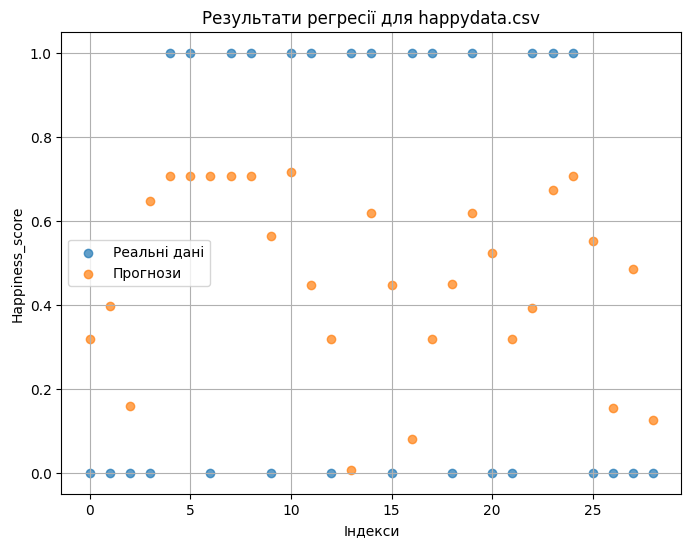

In [22]:
# Архітектура нейронної мережі для регресії
regression_model_happy = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_happy_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # Вихідний шар для регресії
])

# Компіляція моделі
regression_model_happy.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Навчання моделі
history_happy = regression_model_happy.fit(
    X_train_happy_scaled, y_train_happy,
    validation_data=(X_test_happy_scaled, y_test_happy),
    epochs=50, batch_size=16, verbose=1
)

# Оцінка моделі
y_pred_happy = regression_model_happy.predict(X_test_happy_scaled)
print("RMSE (Happiness Data):", np.sqrt(mean_squared_error(y_test_happy, y_pred_happy)))

# Візуалізація результатів
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test_happy)), y_test_happy, label="Реальні дані", alpha=0.7)
plt.scatter(range(len(y_pred_happy)), y_pred_happy, label="Прогнози", alpha=0.7)
plt.title('Результати регресії для happydata.csv')
plt.xlabel('Індекси')
plt.ylabel('Happiness_score')
plt.legend()
plt.grid()
plt.show()

Класифікація для Customer_support_data

Завантаження та обробка даних

In [23]:
# Завантаження даних
support_data = pd.read_csv('Customer_support_data.csv')

# Перегляд структури
print(support_data.head())
print(support_data.info())

# Обробка пропусків, якщо вони є
support_data = support_data.dropna()

# Вибір ознак та цільової змінної
X_support = support_data[['Item_price', 'connected_handling_time', 'Tenure Bucket', 'Agent Shift']]  # Ознаки
y_support = support_data['CSAT Score']  # Цільова змінна (для регресії)

# Перетворення категоричних даних на числові
# Перетворення "Tenure Bucket" на числовий формат (видалення тексту, залишивши тільки числа)
X_support['Tenure Bucket'] = X_support['Tenure Bucket'].str.extract('(\d+)').astype(float)

# Перетворення "Agent Shift" на категорії (One-Hot Encoding)
X_support = pd.get_dummies(X_support, columns=['Agent Shift'], drop_first=True)

# Розподіл даних на тренувальну та тестову вибірки
X_train_support, X_test_support, y_train_support, y_test_support = train_test_split(
    X_support, y_support, test_size=0.2, random_state=42
)

# Масштабування даних
scaler_support = StandardScaler()
X_train_support_scaled = scaler_support.fit_transform(X_train_support)
X_test_support_scaled = scaler_support.transform(X_test_support)

print("Розміри тренувальної вибірки:", X_train_support.shape)
print("Розміри тестової вибірки:", X_test_support.shape)

                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaN  01/08/2023 11:13   
1  d406b0c7-ce17-4654-b9de-f08d421254bd             NaN  01/08/2023 12:52   
2  c273368d-b961-

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17124\1733730984.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_support['Tenure Bucket'] = X_support['Tenure Bucket'].str.extract('(\d+)').astype(float)


Створення та навчання моделі

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaN  01/08/2023 11:13   
1  d406b0c7-ce17-4654-b9de-f08d421254bd             NaN  01/08/2023 12:52   
2  c273368d-b961-

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17124\1348524703.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_support['Tenure Bucket'] = X_support['Tenure Bucket'].str.extract('(\d+)').astype(float)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.7194 - loss: 0.6696 - val_accuracy: 0.8750 - val_loss: 0.6889
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9347 - loss: 0.6873 - val_accuracy: 0.8750 - val_loss: 0.6848
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9347 - loss: 0.6821 - val_accuracy: 0.8750 - val_loss: 0.6805
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9347 - loss: 0.6779 - val_accuracy: 0.8750 - val_loss: 0.6763
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9556 - loss: 0.6715 - val_accuracy: 0.8750 - val_loss: 0.6721
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9347 - loss: 0.6677 - val_accuracy: 0.8750 - val_loss: 0.6678
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9556 - loss: 0.6629 - val_accuracy: 0.8750 - val_loss: 0.6636
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9139 - loss: 0.6579 - val_accuracy: 0.8750 - val_loss: 0.6594
Epoch 9/50

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

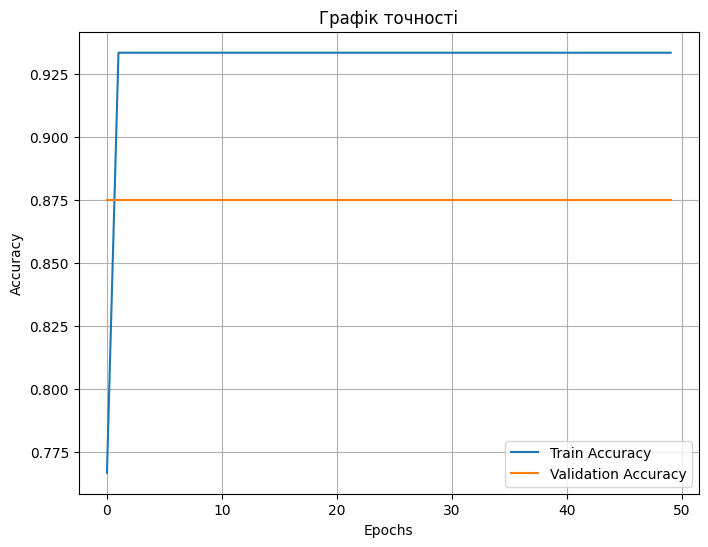

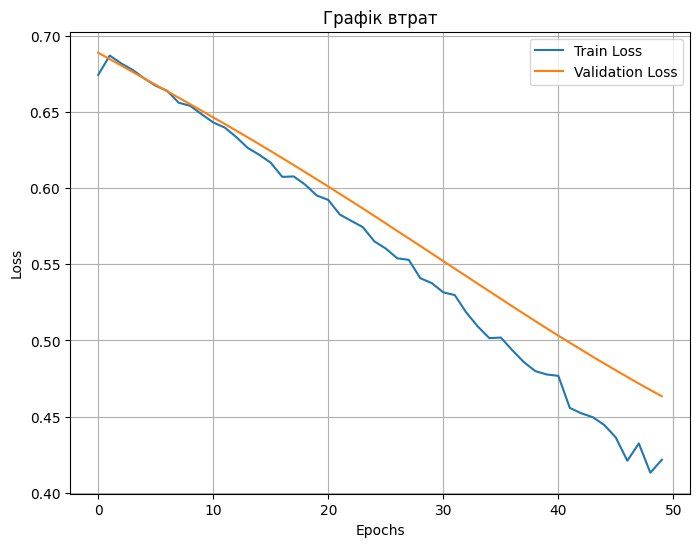

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.3319 - loss: 1.8269 - val_accuracy: 0.8750 - val_loss: 1.6020
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9347 - loss: 1.5999 - val_accuracy: 0.8750 - val_loss: 1.5944
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9347 - loss: 1.5917 - val_accuracy: 0.8750 - val_loss: 1.5868
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9347 - loss: 1.5845 - val_accuracy: 0.8750 - val_loss: 1.5790
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9347 - loss: 1.5750 - val_accuracy: 0.8750 - val_loss: 1.5712
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9139 - loss: 1.5677 - val_accuracy: 0.8750 - val_loss: 1.5632
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9347 - loss: 1.5593 - val_accuracy: 0.8750 - val_loss: 1.5552
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9347 - loss: 1.5482 - val_accuracy: 0.8750 - val_loss: 1.5471

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

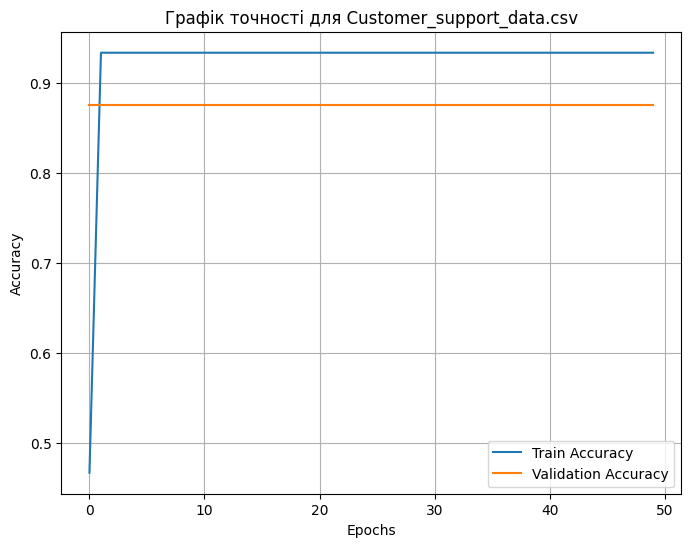

In [24]:
# Архітектура нейронної мережі для класифікації
classification_model_support = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_support_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y_support)), activation='softmax')  # Вихідний шар для кількох класів
])# Завантаження даних
support_data = pd.read_csv('Customer_support_data.csv')

# Перегляд структури
print(support_data.head())
print(support_data.info())

# Обробка пропусків, якщо вони є
support_data = support_data.dropna()

# Вибір ознак та цільової змінної
X_support = support_data[['Item_price', 'connected_handling_time', 'Tenure Bucket', 'Agent Shift']]  # Ознаки
y_support = (support_data['CSAT Score'] >= 4).astype(int)  # Цільова змінна: 1 - Задоволений, 0 - Незадоволений

# Перетворення "Tenure Bucket" на числовий формат (видалення тексту, залишивши тільки числа)
X_support['Tenure Bucket'] = X_support['Tenure Bucket'].str.extract('(\d+)').astype(float)

# Перетворення "Agent Shift" на категорії (One-Hot Encoding)
X_support = pd.get_dummies(X_support, columns=['Agent Shift'], drop_first=True)

# Розподіл даних на тренувальну та тестову вибірки
X_train_support, X_test_support, y_train_support, y_test_support = train_test_split(
    X_support, y_support, test_size=0.2, random_state=42
)

# Масштабування даних
scaler_support = StandardScaler()
X_train_support_scaled = scaler_support.fit_transform(X_train_support)
X_test_support_scaled = scaler_support.transform(X_test_support)

print("Розміри тренувальної вибірки:", X_train_support.shape)
print("Розміри тестової вибірки:", X_test_support.shape)

# Архітектура моделі класифікації
classification_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_support_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Вихідний шар для бінарної класифікації
])

# Компіляція моделі
classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Навчання моделі
history = classification_model.fit(
    X_train_support_scaled, y_train_support,
    validation_data=(X_test_support_scaled, y_test_support),
    epochs=50, batch_size=16, verbose=1
)

# Передбачення та оцінка моделі
y_pred = (classification_model.predict(X_test_support_scaled) > 0.5).astype(int)

print("Точність класифікації:", accuracy_score(y_test_support, y_pred))
print("Класифікаційний звіт:\n", classification_report(y_test_support, y_pred))

# Візуалізація результатів навчання
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Графік точності')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Графік втрат')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Компіляція моделі
classification_model_support.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Навчання моделі
history_support = classification_model_support.fit(
    X_train_support_scaled, y_train_support,
    validation_data=(X_test_support_scaled, y_test_support),
    epochs=50, batch_size=16, verbose=1
)

# Оцінка моделі
y_pred_support = np.argmax(classification_model_support.predict(X_test_support_scaled), axis=1)
print("Точність класифікації (Support Data):", accuracy_score(y_test_support, y_pred_support))
print(classification_report(y_test_support, y_pred_support))

# Візуалізація навчання
plt.figure(figsize=(8, 6))
plt.plot(history_support.history['accuracy'], label='Train Accuracy')
plt.plot(history_support.history['val_accuracy'], label='Validation Accuracy')
plt.title('Графік точності для Customer_support_data.csv')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()